![sk1.jpg](./sk1.jpg)
![sk2.jpg](./sk2.jpg)
![sk3.jpg](./sk3.jpg)
![sk4.jpg](./sk4.jpg)

![prob.jpg](./prob.jpg)

$$
    \ddot{\phi} = - \frac{g}{R} sin\phi
$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, RK45

In [2]:
#Initial conditions
R = 5  #m
g = 9.8 #m/s**2
#phi_0 = math.radians(20) #radians
phi_0 = math.radians(90) #radians

#Timestep
dt = 0.1
#Period of the approximated model
T = 2*np.pi*np.sqrt(R/g)
#Time frame
t = np.arange(0, 5*T, dt)

N = t.size
#[phi, omega].T
y = np.zeros([N,2])
y[0][0] = phi_0

In [3]:
y.T[0]

array([1.57079633, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [4]:
def deriv(t, y, g, R):
    ''' Function that computes the exact derivative '''
    phi = y.T[0]
    omega = y.T[1]
    return np.array([omega, -g/R * np.sin(phi)])

In [5]:
def rk4(t, deriv, y, dt, **kwargs):
    for i in range(len(t)-1):
        k1 = deriv(t[i], y[i][:], **kwargs) * dt
        k2 = deriv(t[i] + dt/2, y[i][:] + k1/2, **kwargs) * dt
        k3 = deriv(t[i] + dt/2, y[i][:] + k2/2,  **kwargs) * dt
        k4 = deriv( t[i], y[i][:] + k3, **kwargs) * dt 
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [6]:
rk4(t, deriv, y, dt, g = g, R = R)

In [7]:
y.T[0], y.T[1]

(array([ 1.57079633,  1.56099637,  1.53159837,  1.48261926,  1.4141248 ,
         1.32628528,  1.21945136,  1.09424588,  0.95166335,  0.79316433,
         0.6207468 ,  0.43697448,  0.24494422,  0.0481835 , -0.14951662,
        -0.34431122, -0.53252033, -0.71082034, -0.87637966, -1.026925  ,
        -1.16074093, -1.27661687, -1.37376152, -1.45170391, -1.51019653,
        -1.54913102, -1.56847226, -1.56821385, -1.54835584, -1.50890499,
        -1.44989768, -1.37144501, -1.27379922, -1.15743846, -1.02316383,
        -0.87219822, -0.70627132, -0.52767137, -0.33924412, -0.1443246 ,
         0.0534002 ,  0.25008395,  0.44193996,  0.62545023,  0.79753096,
         0.95563325,  1.09777387,  1.22250564,  1.32884509,  1.41617785,
         1.48415911,  1.53262225,  1.5615034 ,  1.57078636,  1.56046941,
         1.53055457,  1.48105954,  1.41205202,  1.323706  ,  1.21637811,
         1.0906997 ,  0.94767643,  0.78878226,  0.61602998,  0.43199809,
         0.23979643,  0.04296182, -0.15471045, -0.3

In [8]:
omega_0 = np.sqrt(g/R)

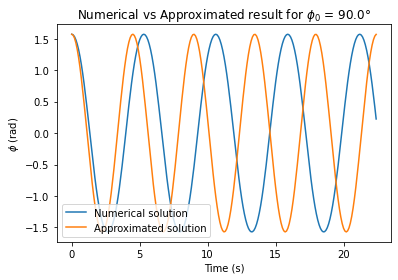

In [9]:
plt.title(f'Numerical vs Approximated result for $\phi_0$ = {math.degrees(phi_0)}°')
plt.plot(t, y.T[0], label = 'Numerical solution')
plt.plot(t, phi_0*np.cos(omega_0*t), label = 'Approximated solution')
plt.legend(loc = 3)
plt.xlabel('Time (s)')
plt.ylabel('$\phi$ (rad)')
plt.show()

After the first couple of periods the exact numerical solution parts from the approximated one. For small angles (e.g. $\phi_0 = 20^°$) the linear approxiamation is almost exact and the trajectory is almost exactly a cosinusoidal curve, as the angles grow the trajectory is still periodic but not an exact sinusoidal curve.

For high initial angles (e.g. $\phi_0 = 90^°$), the small angles approximation is ill-suited from the beginning and so the two trajectories depart immediately.